# Decision Tree for Titanic Data
### Importing the Libs

In [1]:
!pip install plotly --upgrade
!pip install yellowbrick --upgrade

You should consider upgrading via the 'C:\Users\novae\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\novae\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de Titanic

- Fonte (adaptado): https://www.kaggle.com/c/titanic/data

###Exploração dos Dados

In [6]:
base = pd.read_csv('./content/titanic.csv')


In [7]:
base.shape

(891, 12)

In [8]:
base.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [9]:
base.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

It is noticed that there are no inconsistent values


In [10]:
base.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

It does not need the "PassengerId", "Name", "Cabin", "Ticket"

In [11]:
base = base.drop('PassengerId', axis = 1)
base = base.drop('Name', axis = 1)
base = base.drop('Ticket', axis = 1)
base = base.drop('Cabin', axis = 1)

### Missing values ​​handling

In [12]:
base.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

It is Filling the null values with the not null values mean.

In [13]:
base['Age'].fillna(base['Age'].mean(), inplace = True)
base.shape

(891, 8)

It is dropping the NaN values of 'Embarked'

In [14]:
base= base.drop(base[base['Embarked'].isna()].index)
base.shape

(889, 8)

In [15]:
base.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
base

Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[889 rows x 8 columns]

### Data Visualization

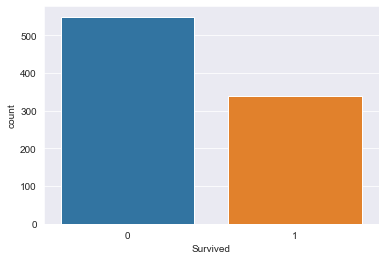

In [17]:
sns.countplot(x = base['Survived']);

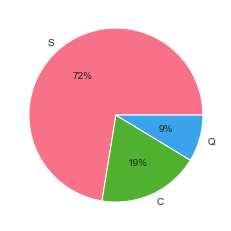

In [18]:
plt.pie(list(base.Embarked.value_counts().to_dict().values()),
        labels=list(base.Embarked.value_counts().to_dict().keys()),
        colors=sns.color_palette('husl',3),
        autopct='%.0f%%')
plt.show()

# Exploratory Analysis

In [19]:
grafico = px.treemap(base, path=['Survived', 'Pclass', 'Embarked'])
grafico.show()

C:\Users\novae\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
C:\Users\novae\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
C:\Users\novae\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


In [20]:
grafico = px.parallel_categories(base, dimensions=['Pclass', 'Sex', 'Survived'])
grafico.show()

In [21]:
grafico = px.scatter_matrix(base, dimensions=['SibSp', 'Parch', 'Fare', 'Age'], color = 'Survived')
grafico.show()

<AxesSubplot:>

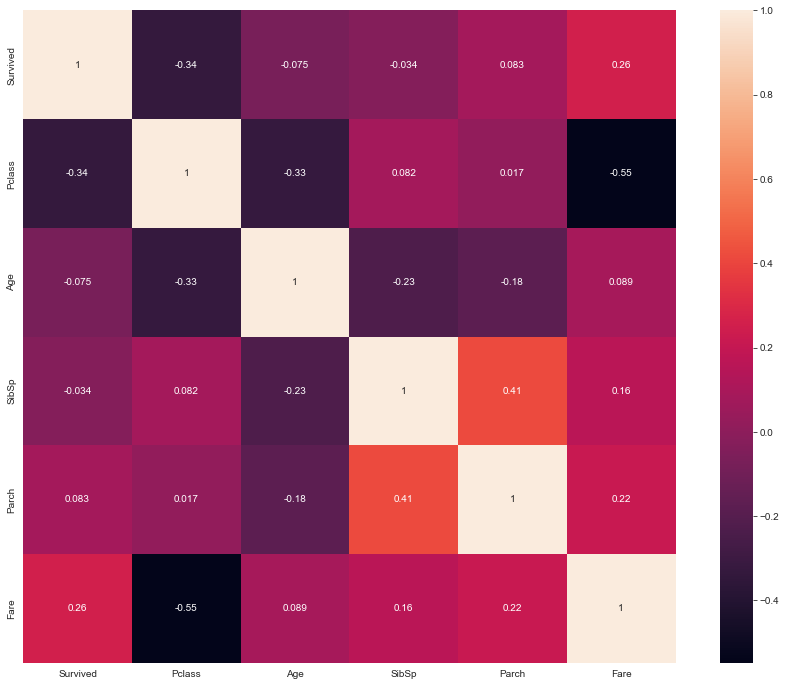

In [22]:
plt.subplots(figsize=(16,12))
sns.heatmap(
    base.corr(),
    annot=True,
    square=True,
    cbar=True
)

## Divion between predictor and class

In [23]:
base.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [24]:
X_Titanic = base.iloc[:, 1:8].values
X_Titanic

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.69911764705882, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [25]:
Y_Titanic = base.iloc[:, 0].values
Y_Titanic

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

## Categorical attribute handling


### LabelEncoder
preparing our data for our models

In [26]:
from sklearn.preprocessing import LabelEncoder
X_Titanic[:,1] = LabelEncoder().fit_transform(X_Titanic[:,1])
X_Titanic[:,1]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [27]:
X_Titanic[:,6] = LabelEncoder().fit_transform(X_Titanic[:,6])
X_Titanic[:,6]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

## Escalation of values

In [28]:
from sklearn.preprocessing import MinMaxScaler
X_Titanic =  MinMaxScaler().fit_transform(X_Titanic)
X_Titanic

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.01415106,
        1.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.01546857,
        1.        ],
       ...,
       [1.        , 0.        , 0.36792055, ..., 0.33333333, 0.04577135,
        1.        ],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.01512699,
        0.5       ]])

# Division of bases into training and testing

In [29]:
from sklearn.model_selection import train_test_split
X_Titanic_treinamento, X_Titanic_teste, Y_Titanic_treinamento, Y_Titanic_teste = train_test_split(X_Titanic, Y_Titanic, test_size = 0.25, random_state = 0)

In [30]:
X_Titanic_treinamento.shape, Y_Titanic_treinamento.shape

((666, 7), (666,))

In [31]:
X_Titanic_teste.shape, Y_Titanic_teste.shape

((223, 7), (223,))

## Saving the variables

In [32]:
import pickle
with open('titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_Titanic_treinamento, Y_Titanic_treinamento, X_Titanic_teste, Y_Titanic_teste], f)

##Training the Model with a Decision Tree 76,23% of precision

In [52]:
from sklearn.tree import DecisionTreeClassifier
arvore_Titanic = DecisionTreeClassifier(criterion='entropy')
arvore_Titanic.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [34]:
arvore_Titanic.feature_importances_

array([0.11216816, 0.24608242, 0.28688116, 0.04836535, 0.03000124,
       0.24917688, 0.02732478])

In [35]:
arvore_Titanic.classes_

array([0, 1], dtype=int64)

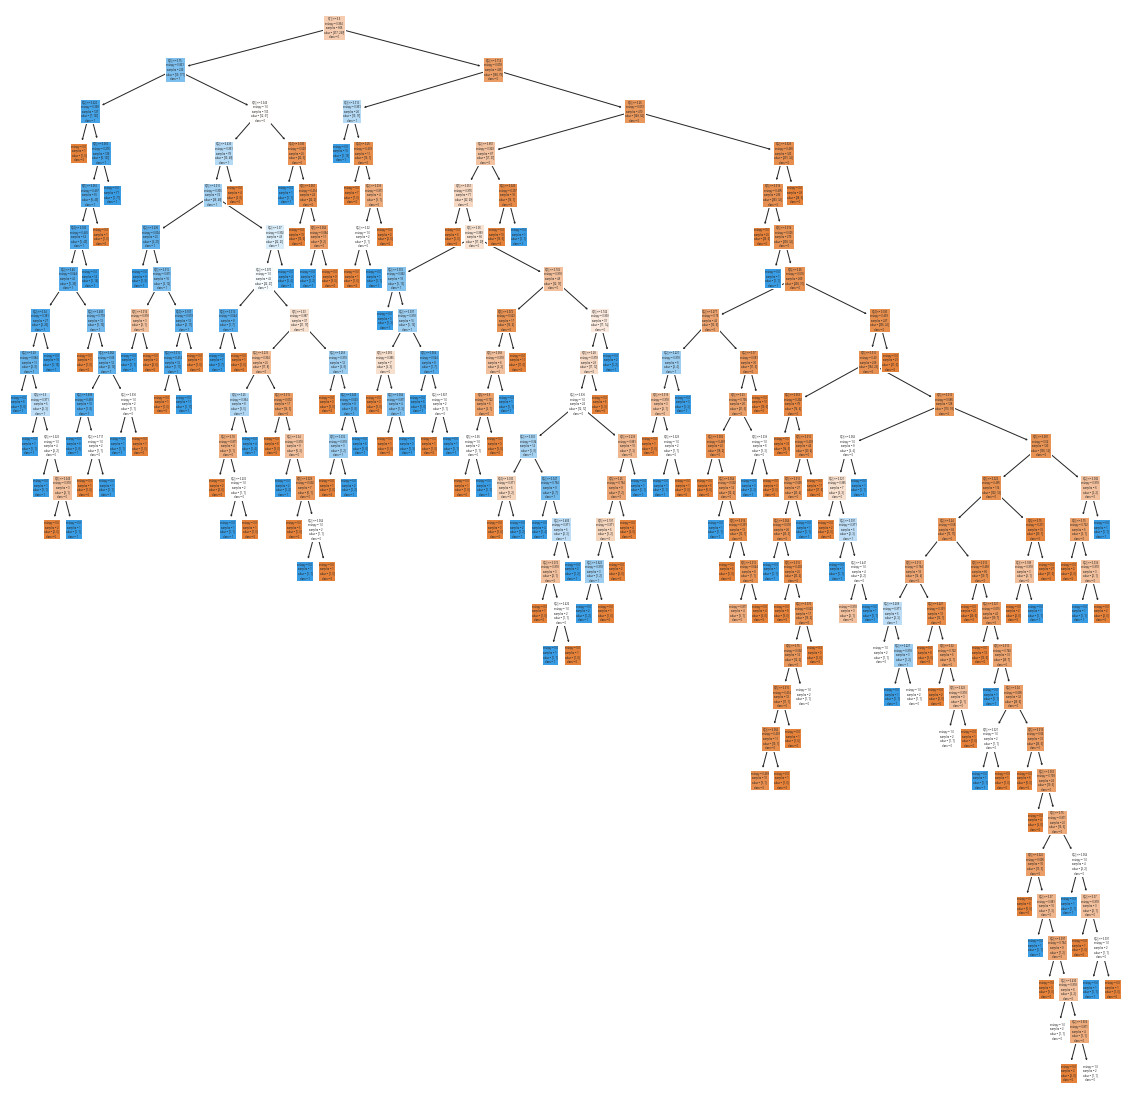

In [36]:
from sklearn import  tree
#previsores = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_Titanic, class_names = ['0','1'], filled=True);

In [37]:
previsoes_Titanic = arvore_Titanic.predict(X_Titanic_teste)

In [38]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_Titanic_teste, previsoes_Titanic)

0.7668161434977578

0.7668161434977578

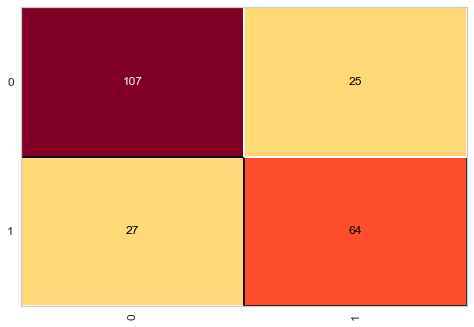

In [39]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_Titanic)
cm.fit(X_Titanic_treinamento, Y_Titanic_treinamento)
cm.score(X_Titanic_teste, Y_Titanic_teste)

In [40]:
print(classification_report(Y_Titanic_teste, previsoes_Titanic))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       132
           1       0.72      0.70      0.71        91

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [83]:
def trainAndAnalyze(model):
    model.fit(X_Titanic_treinamento, Y_Titanic_treinamento)
    print("Model score:")
    print(model.score(X_Titanic_teste, Y_Titanic_teste))
    print("Classification Report")
    print(classification_report(Y_Titanic_teste, model.predict(X_Titanic_teste)))
    print("Confusion Matrix:")
    confMatrix = ConfusionMatrix(model)
    confMatrix.fit(X_Titanic_treinamento, Y_Titanic_treinamento)
    confMatrix.score(X_Titanic_teste,Y_Titanic_teste)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
    tree.plot_tree(model, class_names = ['0','1'], filled=True)
    print("Tree:")

## Changing some parameters in our Decision Tree Classifier

We suspect that if we define a maximum number of levels for our tree, we can avoid overfitting

Model score:
0.7847533632286996
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       132
           1       0.76      0.69      0.72        91

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

Confusion Matrix:
Tree:


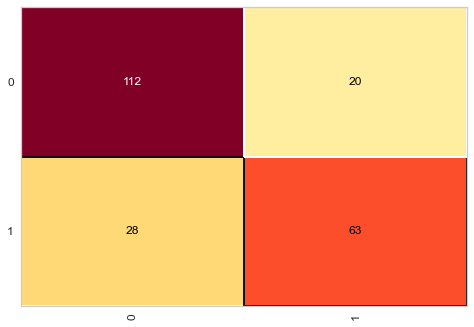

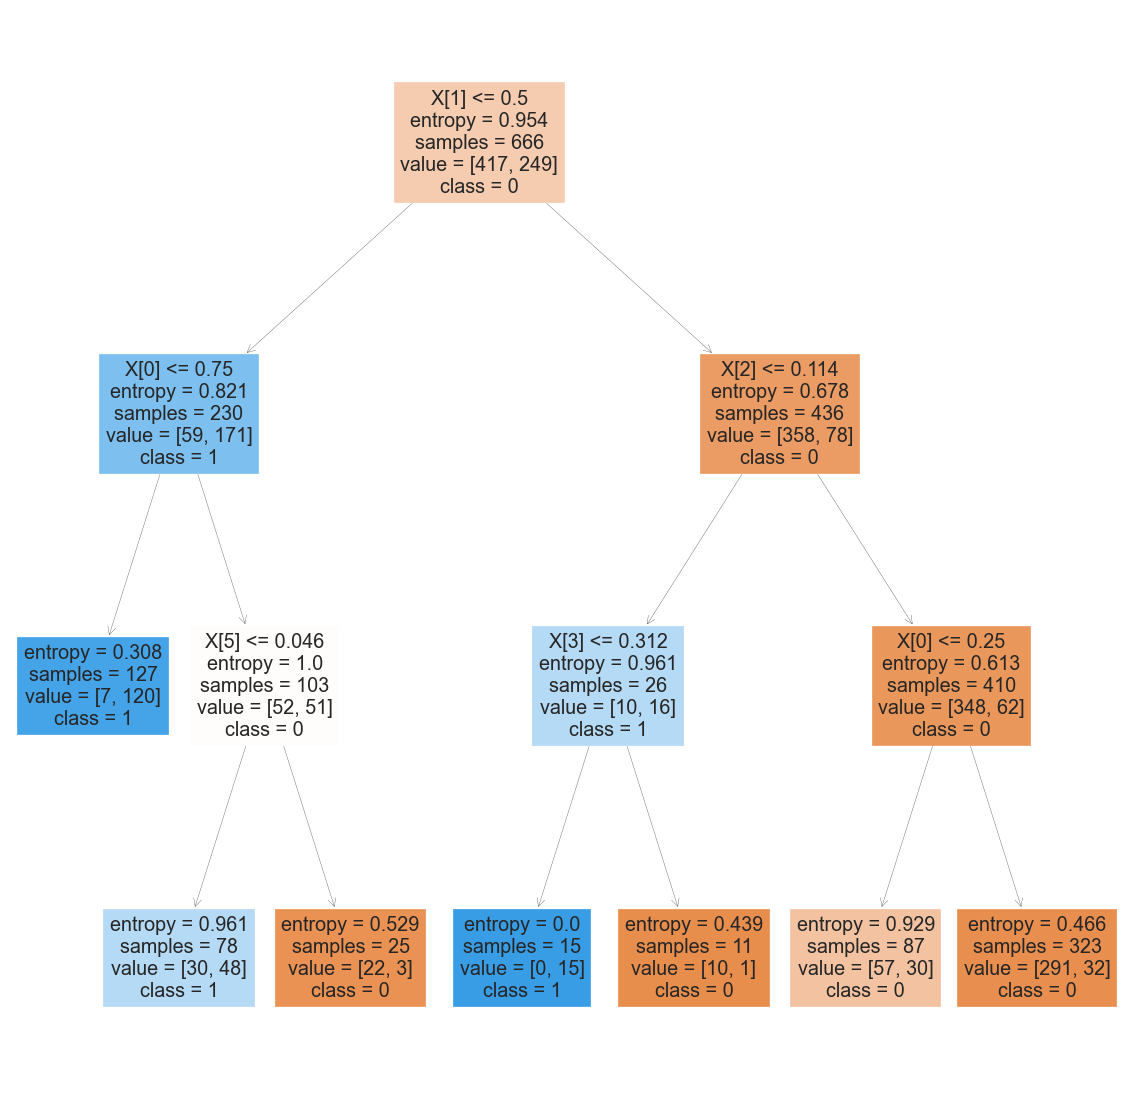

In [84]:
tree2 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    splitter='best',
    max_features=None,
    min_impurity_decrease=0.01
)
trainAndAnalyze(tree2)

Model score:
0.7668161434977578
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       132
           1       0.75      0.64      0.69        91

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.77      0.77      0.76       223

Confusion Matrix:
Tree:


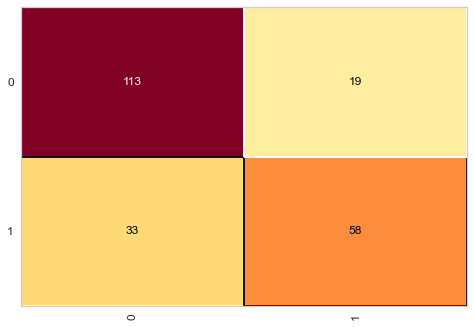

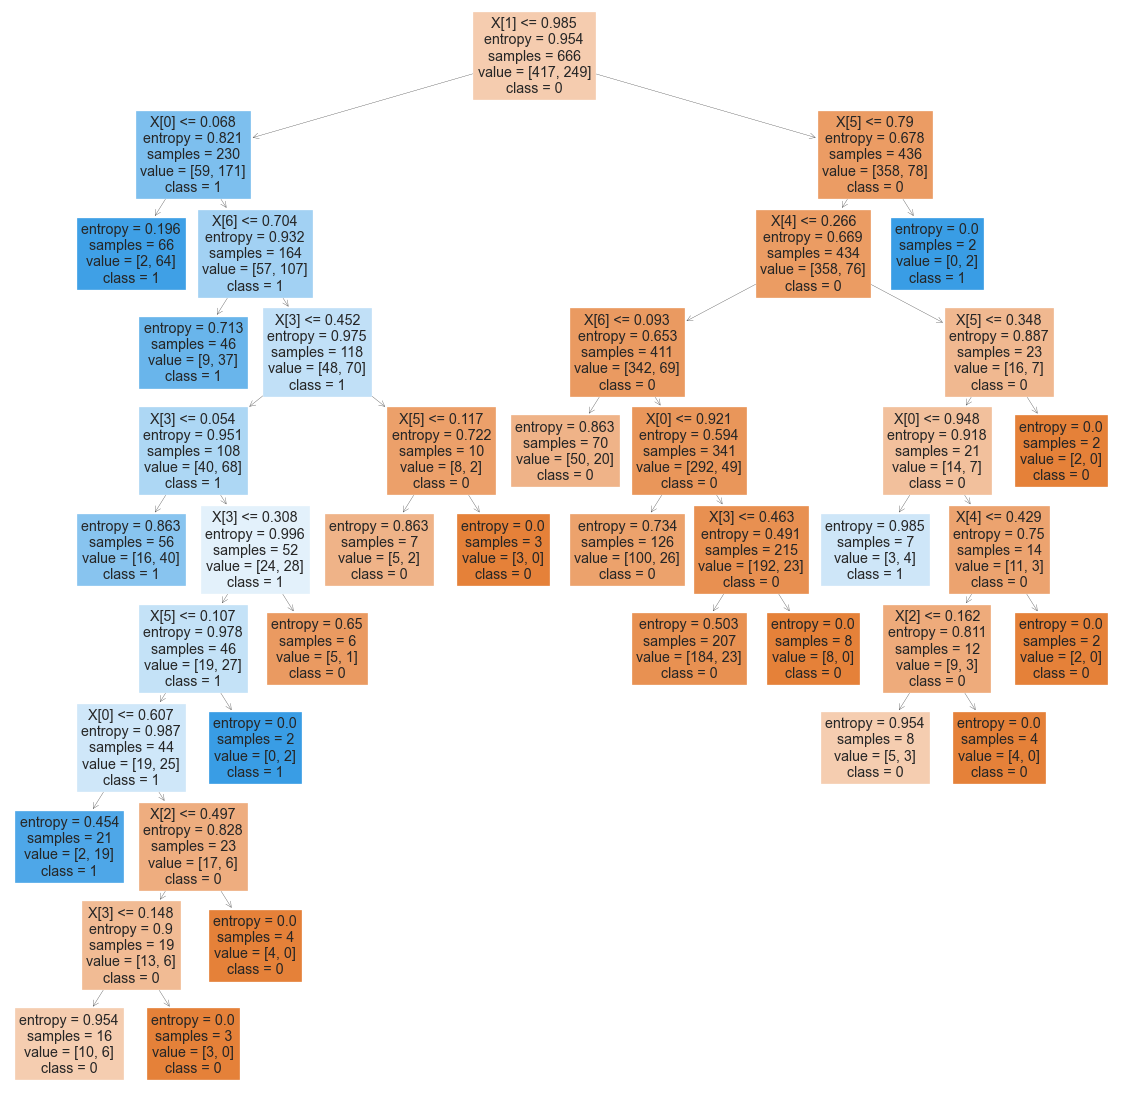

In [92]:
trainAndAnalyze(
    DecisionTreeClassifier(
        criterion='entropy',
        max_depth=50,
        min_samples_split=10,
        splitter='random',
        max_features='auto',
        min_impurity_decrease=0.001
    )
)

Model score:
0.7982062780269058
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       132
           1       0.79      0.68      0.73        91

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

Confusion Matrix:
Tree:


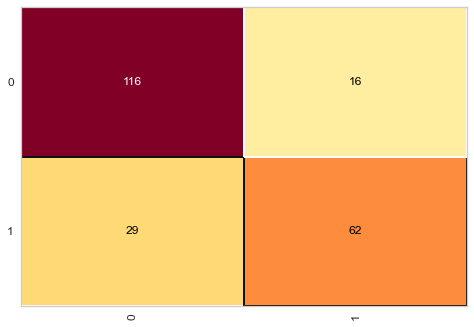

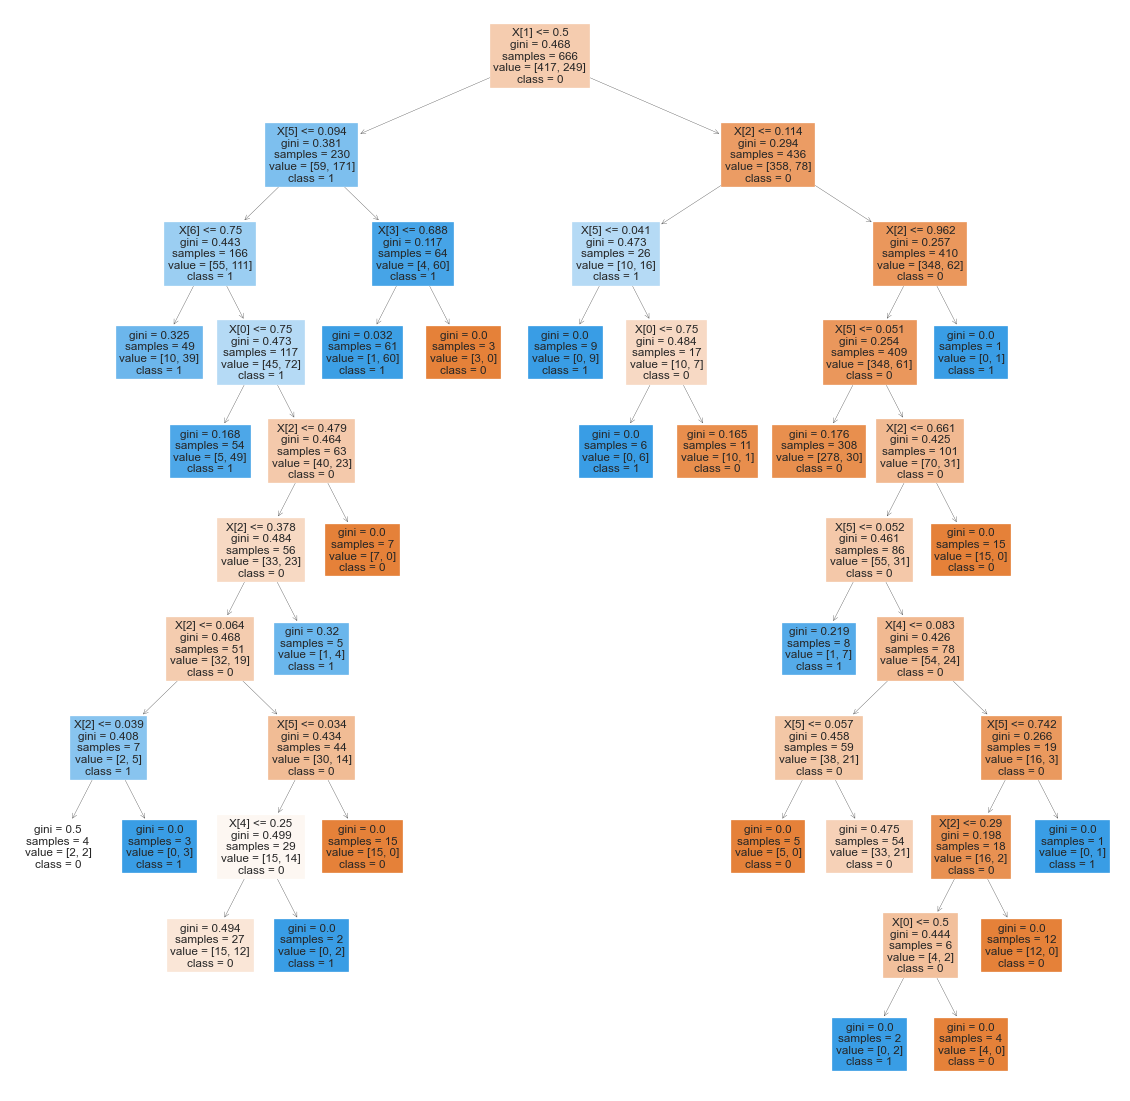

In [98]:
trainAndAnalyze(
    DecisionTreeClassifier(
        criterion='gini',
        max_depth=50,
        min_samples_split=6,
        splitter='best',
        max_features='log2',
        min_impurity_decrease=0.001
    )
)

Model score:
0.7757847533632287
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       132
           1       0.71      0.77      0.74        91

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

Confusion Matrix:
Tree:


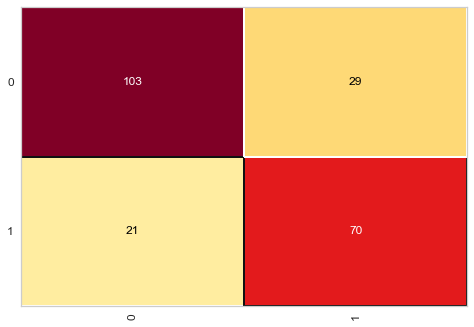

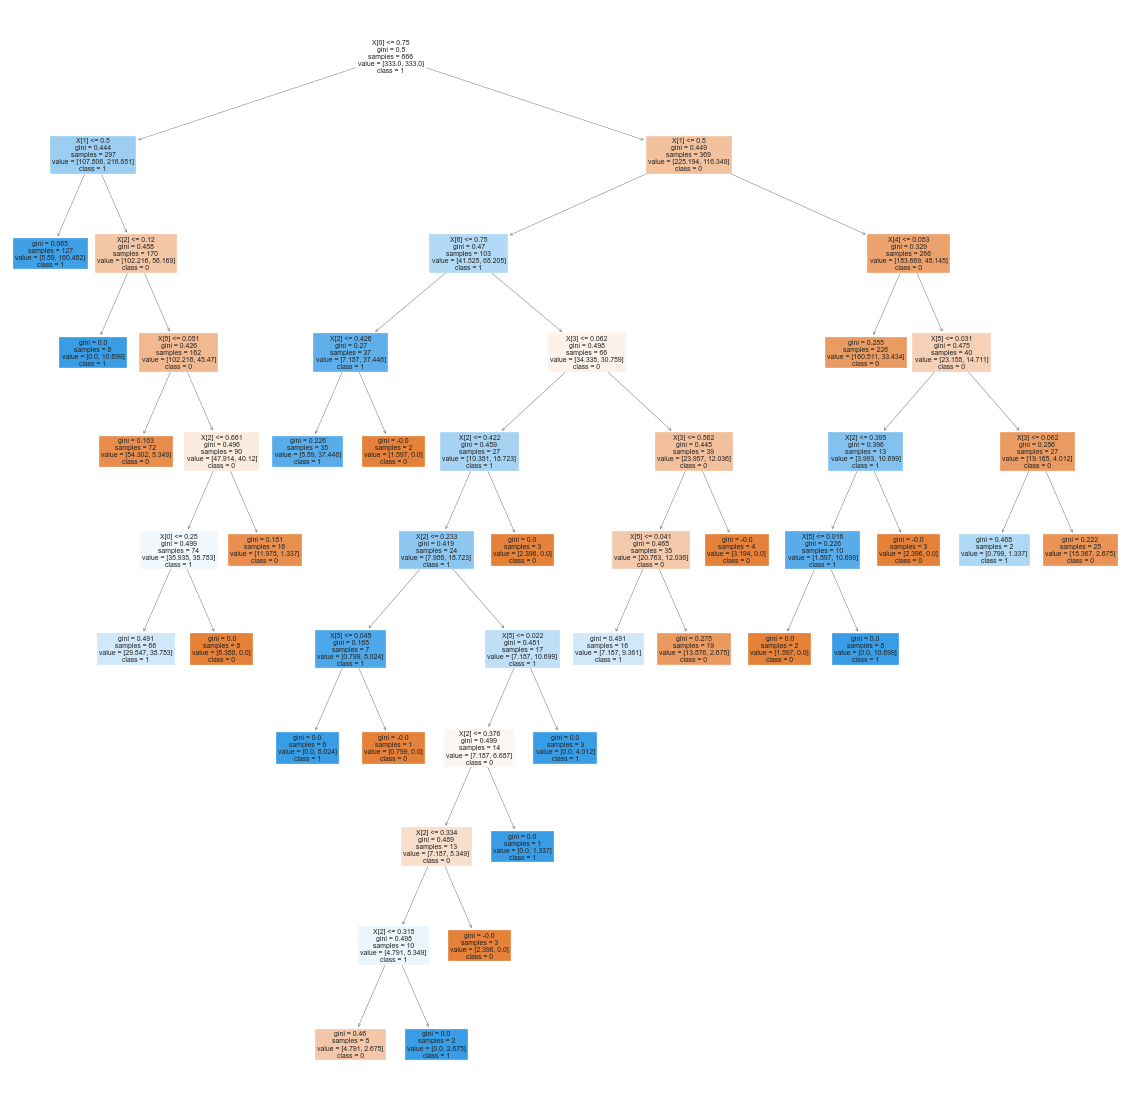

In [107]:
trainAndAnalyze(
    DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        min_samples_split=5,
        splitter='best',
        max_features='log2',
        min_impurity_decrease=0.001,
        min_weight_fraction_leaf=0.001,
        class_weight='balanced'
    )
)

Model score:
0.757847533632287
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       132
           1       0.70      0.71      0.71        91

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223

Confusion Matrix:
Tree:


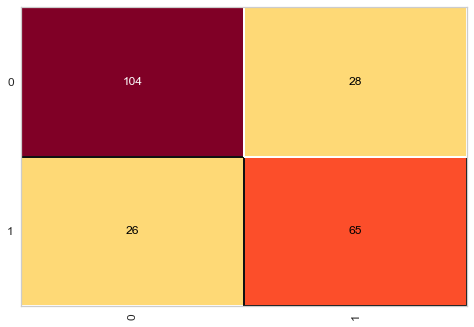

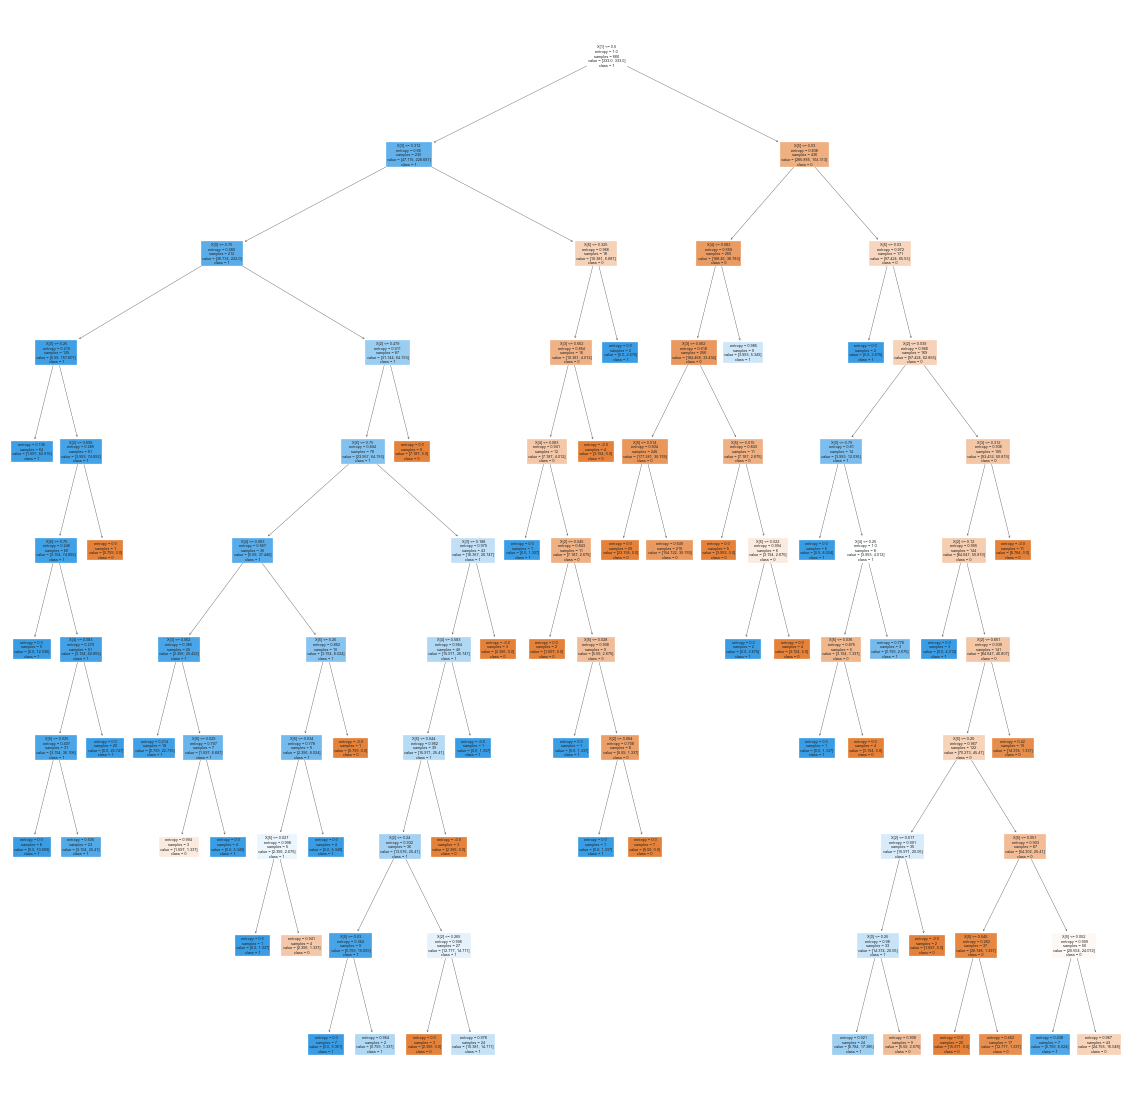

In [108]:
trainAndAnalyze(
    DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        min_samples_split=5,
        splitter='best',
        max_features='log2',
        min_impurity_decrease=0.001,
        min_weight_fraction_leaf=0.001,
        class_weight='balanced'
    )
)

Model score:
0.7757847533632287
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       132
           1       0.75      0.67      0.71        91

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223

Confusion Matrix:
Tree:


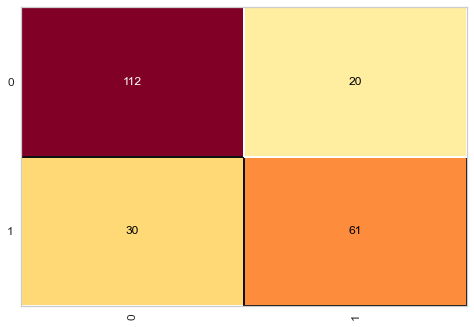

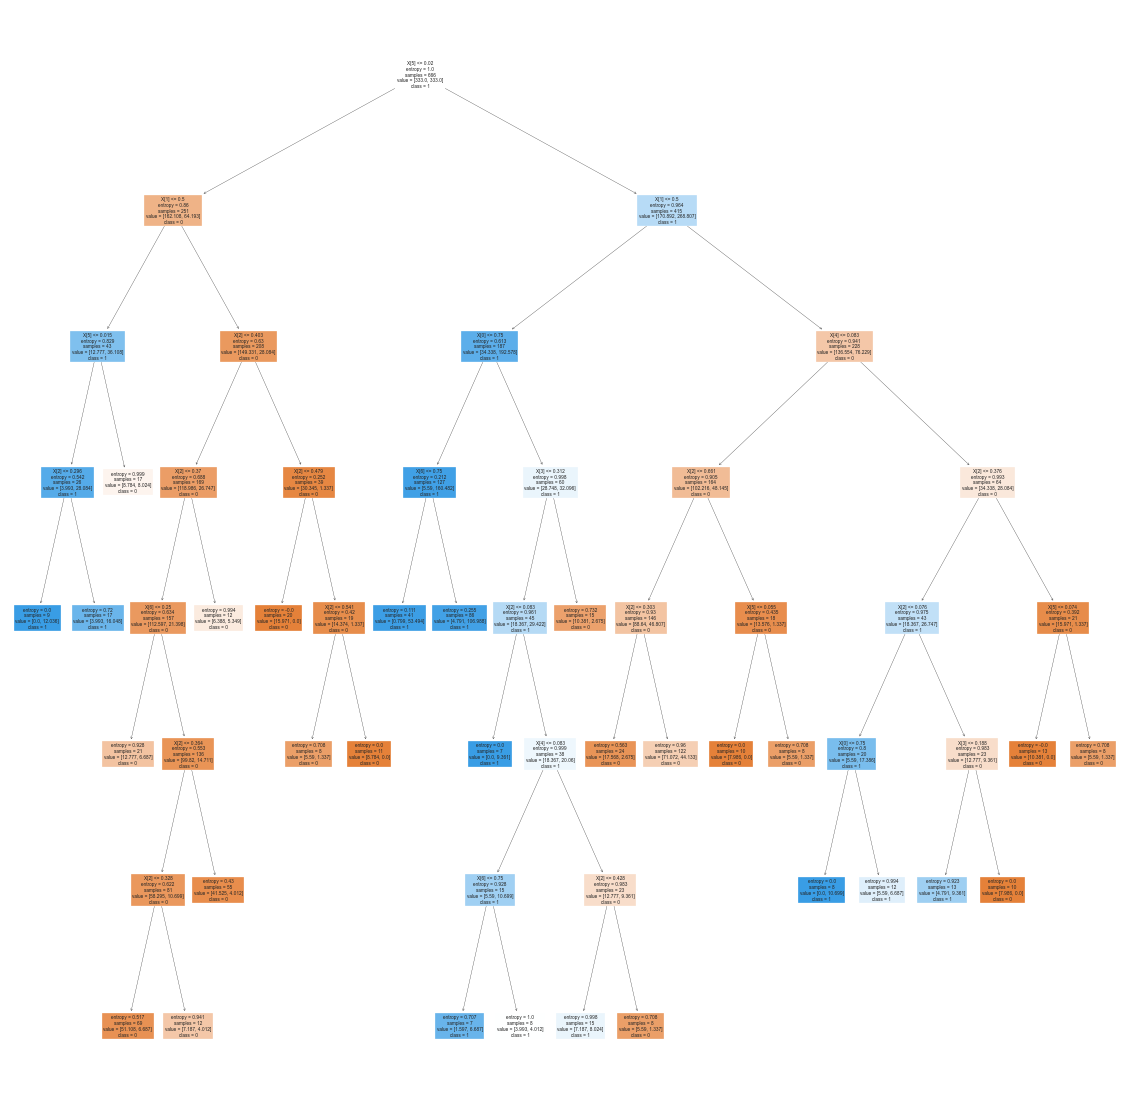

In [113]:
trainAndAnalyze(
    DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        min_samples_split=10,
        splitter='best',
        max_features='log2',
        min_impurity_decrease=0.001,
        min_weight_fraction_leaf=0.01,
        class_weight='balanced'
    )
)

Two things are very important to control and experiment: The levels of our tree and the split criteria.
Because we split too much we can get overfitting and if we have few nodes we may get underfitting

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

####With 2 trees 74,89%

In [42]:
random_forest_Titanic2 = RandomForestClassifier(n_estimators=2, criterion='entropy', random_state = 0)
random_forest_Titanic2.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=2, random_state=0)

In [43]:
previsoes2 = random_forest_Titanic2.predict(X_Titanic_teste)
accuracy_score(Y_Titanic_teste, previsoes2)

0.7488789237668162


#### With 5 Trees 80,27%

In [44]:
random_forest_Titanic5 = RandomForestClassifier(n_estimators=5, criterion='entropy', random_state = 0)
random_forest_Titanic5.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [45]:
previsoes5 = random_forest_Titanic5.predict(X_Titanic_teste)
accuracy_score(Y_Titanic_teste, previsoes5)

0.8026905829596412

#### With 40 Trees 78,03%

In [46]:
random_forest_Titanic40 = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_Titanic40.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [47]:
previsoes40 = random_forest_Titanic40.predict(X_Titanic_teste)
accuracy_score(Y_Titanic_teste, previsoes40)

0.7802690582959642

#### With 10 Trees 79,37%

In [93]:
random_forest_Titanic10 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state = 0)
random_forest_Titanic10.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [94]:
previsoes10 = random_forest_Titanic10.predict(X_Titanic_teste)
accuracy_score(Y_Titanic_teste, previsoes10)

0.7937219730941704

The best is with 5 Trees

0.8026905829596412

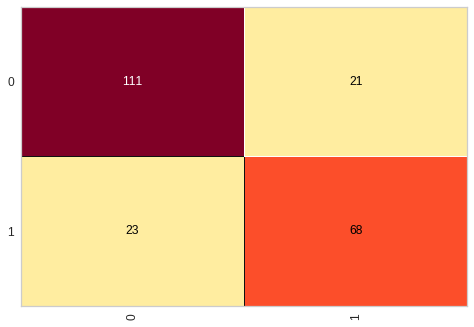

In [95]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_Titanic5)
cm.fit(X_Titanic_treinamento, Y_Titanic_treinamento)
cm.score(X_Titanic_teste, Y_Titanic_teste)

In [96]:
print(classification_report(Y_Titanic_teste, previsoes5))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       132
           1       0.76      0.75      0.76        91

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.80      0.80      0.80       223

